# Project: Investigate a Dataset TMDb movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I will be investigating the TMDb movies dataset. The dataset is avialable on kaggle via the [link](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata) 
> 
> Also I will providing answers to some important questions and uncovering some interesting insight about the data set.
>
> Some of the question that we will attempt to explore includes;

>> What movies gained the most popularity?
>>
>> Investigate the existence a relationship between budget and revenue.
>>
>> Investigate which popular movies generate the highest revenue.
>>
>> Understand how the production of movies is increasing as the year increases.
>>
>> Investigate if the vote_counts tends to generate highest budget.
>>
>> Know the director that generates the Highest Revenue.
>>
>> The Years with the Highest Revenue.

In [1]:
# Import the dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

%matplotlib inline
plt.style.use('seaborn-darkgrid')

pd.set_option('display.max_columns', 36)

filterwarnings('ignore')

#plt.style.available

<a id='wrangling'></a>
## Data Wrangling

> This section is where data loading will be performed, the data is location in my local directory and it will be loaded into jupyter lab using pandas library
>
> Having load the data you will observe that the data is unclear an this will be the major focus of this section
>
> We are also going to get ourselves familarized with the dataset by taking a preview of the attributes and rows of the data, we are also going to look at the shape and perform some statistics to help understand the data
>
> Some of the data cleaning that we will be performing includes:
>> formatting correctly the data type for instance the `release year` is loaded as a string so it will be converting to datetime
>>
>> Another important data wrangling that will be performed is splitting columns that has more than one embedded details in them such as `genres` etc
>>
>> Final we are going to remove duplicates and check for null values
>>
>> From the investigation below it is clear that our data contains missing values but for the purpose of this analysis the will be left untouched as it has no effect on the outcome of the analysis.

In [2]:
# Path to the dataset
file_path = 'databases/Database_TMDb_movie_data/tmdb-movies.csv'

In [3]:
df = pd.read_csv(file_path, index_col='id') # Loading the data as df(dataframe)
df.head(3) # Previewing the first three rows of the data

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
df.shape # The raw data has 10866 rows and 20 columns (features)

(10866, 20)

In [5]:
df.info() # Taking a deeper look into the metadata of the data such as the column type etc.
# Some of the feature data type are wrongly represented hence there is a need for the features to be converted to the appopriate data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count    

In [6]:
df.isna().sum() # Below is an analysis of the number of missing value accross each feature

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df['release_date'] = pd.to_datetime(df['release_date']) # The release_data is represented as a string as shown above, the below in this line helps convert it to datetime
print(df['release_date'].dtype) # Checking the release_date data type to confirm it is rightly represented

datetime64[ns]


In [8]:
# With this function we will be refactoring the clustered columns by breaking up the strings into their own seperate columns
def string_refactoring(col_name, df):
    col_refactory = df[col_name].str.split('|', expand=True).rename(columns = {0 : col_name + '_1', 
                                                                            1 : col_name + '_2', 
                                                                            2 : col_name + '_3', 
                                                                            3 : col_name + '_4', 
                                                                            4 : col_name + '_5'})
    return pd.concat([df, col_refactory], 1).drop(columns = col_name)

In [9]:
# The function above is now been applied to the our raw data frame
for col_name in ['cast', 'keywords', 'genres', 'production_companies']:
    df = string_refactoring(col_name, df)
df.columns

Index(['imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'homepage', 'director', 'tagline', 'overview', 'runtime',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj', 'cast_1', 'cast_2', 'cast_3', 'cast_4',
       'cast_5', 'keywords_1', 'keywords_2', 'keywords_3', 'keywords_4',
       'keywords_5', 'genres_1', 'genres_2', 'genres_3', 'genres_4',
       'genres_5', 'production_companies_1', 'production_companies_2',
       'production_companies_3', 'production_companies_4',
       'production_companies_5'],
      dtype='object')

In [10]:
df[df.duplicated(keep=False)].sort_values('original_title') # How dataset also contain duplicate rows as shown below

,imdb_id,popularity,budget,revenue,original_title,homepage,director,tagline,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast_1,cast_2,cast_3,cast_4,cast_5,keywords_1,keywords_2,keywords_3,keywords_4,keywords_5,genres_1,genres_2,genres_3,genres_4,genres_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42194,tt0411951,0.59643,30000000,967000,TEKKEN,NaN,Dwight H. Little,Survival is no game,"In the year of 2039, after World Wars destroy ...",92,2010-03-20,110,5.0,2010,30000000.0,967000.0,Jon Foo,Kelly Overton,Cary-Hiroyuki Tagawa,Ian Anthony Dale,Luke Goss,martial arts,dystopia,based on video game,martial arts tournament,None,Crime,Drama,Action,Thriller,Science Fiction,Namco,Light Song Films,None,None,None
42194,tt0411951,0.59643,30000000,967000,TEKKEN,NaN,Dwight H. Little,Survival is no game,"In the year of 2039, after World Wars destroy ...",92,2010-03-20,110,5.0,2010,30000000.0,967000.0,Jon Foo,Kelly Overton,Cary-Hiroyuki Tagawa,Ian Anthony Dale,Luke Goss,martial arts,dystopia,based on video game,martial arts tournament,None,Crime,Drama,Action,Thriller,Science Fiction,Namco,Light Song Films,None,None,None


In [11]:
df.drop_duplicates(inplace=True) # Removing the duplicate rows

In [12]:
df.shape # The new shape of the data that will be used for our analysis

(10865, 36)

In [13]:
df.head(3) # Preview of the data that will be used for our analysis

,imdb_id,popularity,budget,revenue,original_title,homepage,director,tagline,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast_1,cast_2,cast_3,cast_4,cast_5,keywords_1,keywords_2,keywords_3,keywords_4,keywords_5,genres_1,genres_2,genres_3,genres_4,genres_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,monster,dna,tyrannosaurus rex,velociraptor,island,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,future,chase,post-apocalyptic,dystopia,australia,Action,Adventure,Science Fiction,Thriller,None,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
262500,tt2908446,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,based on novel,revolution,dystopia,sequel,dystopic future,Adventure,Science Fiction,Thriller,None,None,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None


In [14]:
df.select_dtypes('number').describe().T # Statistics of the numberical portion of the data

,count,mean,std,min,25%,50%,75%,max
popularity,10865.0,6.464456e-01,1.000231e+00,0.000065,0.207575,0.383831,7.138570e-01,3.298576e+01
budget,10865.0,1.462429e+07,3.091428e+07,0.000000,0.000000,0.000000,1.500000e+07,4.250000e+08
revenue,10865.0,3.982690e+07,1.170083e+08,0.000000,0.000000,0.000000,2.400000e+07,2.781506e+09
runtime,10865.0,1.020718e+02,3.138270e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,10865.0,2.173996e+02,5.756446e+02,10.000000,17.000000,38.000000,1.460000e+02,9.767000e+03
vote_average,10865.0,5.975012e+00,9.351381e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,10865.0,2.001322e+03,1.281326e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,10865.0,1.754989e+07,3.430753e+07,0.000000,0.000000,0.000000,2.085325e+07,4.250000e+08
revenue_adj,10865.0,5.136900e+07,1.446383e+08,0.000000,0.000000,0.000000,3.370173e+07,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

### The most popular movies
#### Also we want to know the revenue and budget of the most popular movies
- With this analysis we are interested in knowing the movies that has been able to gain popularity in the over the time time interval as provided by the data. It is interesting to know that jurassic world, mad max: fury road etc. where very popular which means there where able to gain people attention
- Generally speaking we can judge that most of the popular movies are movies there are heavily invested in and in turn they where able to generate high revenue

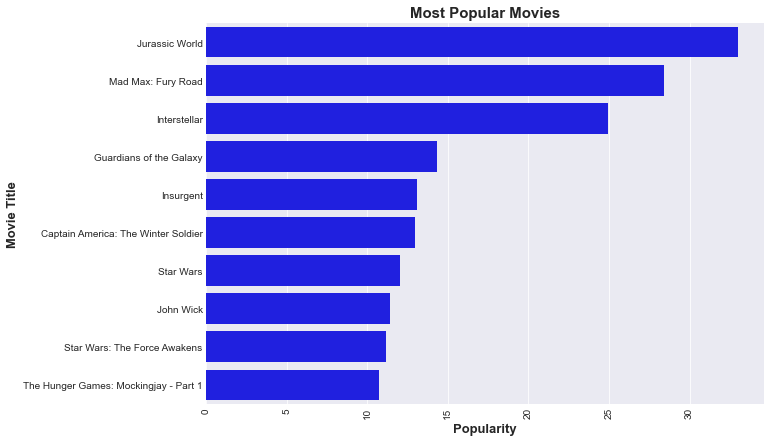

In [54]:
# df.sort_values(by='popularity', ascending=False).head(10)#.plot.bar(x='popularity', y='imdb_id')
plt.figure(figsize=(10,7))
sns.barplot(data=df.sort_values(by='popularity', ascending=False).head(10), y = 'original_title', x='popularity', color='blue', orient='h')
plt.title('Most Popular Movies', size = 15, weight='bold')
plt.ylabel('Movie Title', size=13, weight='bold')
plt.xlabel('Popularity', size=13, weight='bold')
plt.xticks(rotation=90);

- <b> Investigating the budget and revenue to determine whether it has an influence on the popularity </b>

In [37]:
# Investigating the budget and revenue to determine whether it has an influence on the popularity
## cm = sns.light_palette('green', as_cmap=True)

bud_rev_pop = df.sort_values(by='popularity', ascending=False).head(10).loc[ : , ['original_title', "popularity", "budget", "revenue"]].set_index('original_title')

## bud_rev_pop.style.background_gradient(cmap=cm).set_precision(2)

# Adding some string formating to have a better representation of the data
bud_rev_pop['revenue'] = (bud_rev_pop['revenue']/1000000).map('${:,.2f}M'.format)
bud_rev_pop['budget'] = (bud_rev_pop['budget']/1000000).map('${:,.2f}M'.format)
bud_rev_pop['popularity'] = bud_rev_pop['popularity'].map('{:.2f}'.format)

bud_rev_pop # Generated formatted table

,popularity,budget,revenue
original_title,,,
Jurassic World,32.99,$150.00M,"$1,513.53M"
Mad Max: Fury Road,28.42,$150.00M,$378.44M
Interstellar,24.95,$165.00M,$621.75M
Guardians of the Galaxy,14.31,$170.00M,$773.31M
Insurgent,13.11,$110.00M,$295.24M
Captain America: The Winter Soldier,12.97,$170.00M,$714.77M
Star Wars,12.04,$11.00M,$775.40M
John Wick,11.42,$20.00M,$78.74M
Star Wars: The Force Awakens,11.17,$200.00M,"$2,068.18M"


### The Relationship Between Revenue and Popularity

- Investigating further we are going to visualize and see if there reachly exist a trend between the Revenue and the Popularity

- We will be using a scatter plot and regression plot in this section and also we use the correlation coefficient to determine if there is a correlation between the two variable

- It is very clear from the graph below that movies that a popular generate the high revenue

                 CORRELATION
            revenue  popularity
popularity  0.66336         1.0




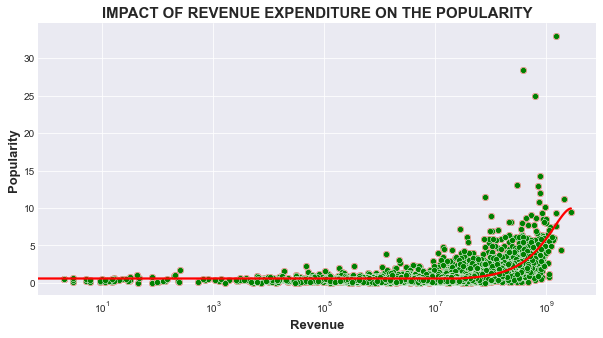

In [88]:
plt.figure(figsize=(10,5))
sns.regplot(data=df, x ='revenue', y='popularity', ci=None, order=2, color='red')
sns.scatterplot(data=df, x ='revenue', y='popularity', color='green')
plt.xlabel('Revenue', size=13, weight='bold')
plt.ylabel('Popularity', size=13, weight='bold')
plt.title("IMPACT OF REVENUE EXPENDITURE ON THE POPULARITY", size=15, weight='bold')
plt.xscale("log");
print('                 CORRELATION', end = '\n')
print(df[['revenue', 'popularity']].corr().iloc[1:])
print('\n')

### The Relationship Between Budget and Revenue

- In this section we will be investigating if there exist any relationship between the Budget spent in the process of producting a movie and revenue generate on the movie we will be using a scatter plot cum a regression plot and also we are going to R square to have a feel whether there exist a strong correlation

- In the plot below we see that is exist a linear relationship between the budget and revenue so we can say that by chance movies that are producted with higher budget are likely to have a high revenue

                 CORRELATION
           budget  revenue
revenue  0.734928      1.0




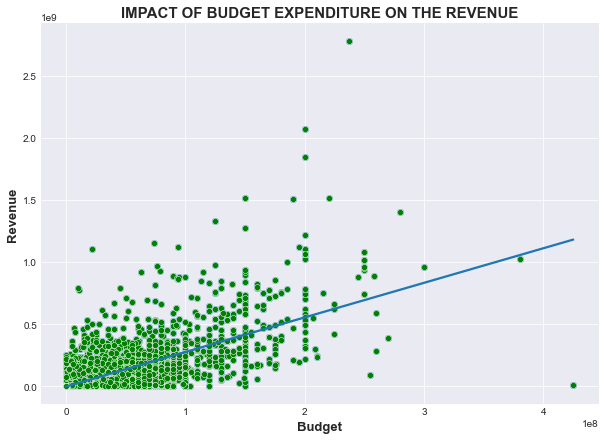

In [89]:
plt.figure(figsize=(10,7))
sns.regplot(data=df, x ='budget', y='revenue', ci=None)
sns.scatterplot(data=df, x ='budget', y='revenue', color='green')
plt.xlabel('Budget', size=13, weight='bold')
plt.ylabel('Revenue', size=13, weight='bold')
plt.title("IMPACT OF BUDGET EXPENDITURE ON THE REVENUE", size=15, weight='bold');
print('                 CORRELATION', end = '\n')
print(df[['budget', 'revenue']].corr().iloc[1:])
print('\n')

### The Relationship Between Budget and Vote_count

- We are interested in this section to investigate the impact of budget expended on a movie on the how much vote the movie got

- We will make use a scatter plot with vote_count on the y-axis and budget on the x-axis

- In the plot below we see that is exist a exponential relationship between the budget and vote_count so we can say that movies that are producted with higher budget are likely to have a higher vote

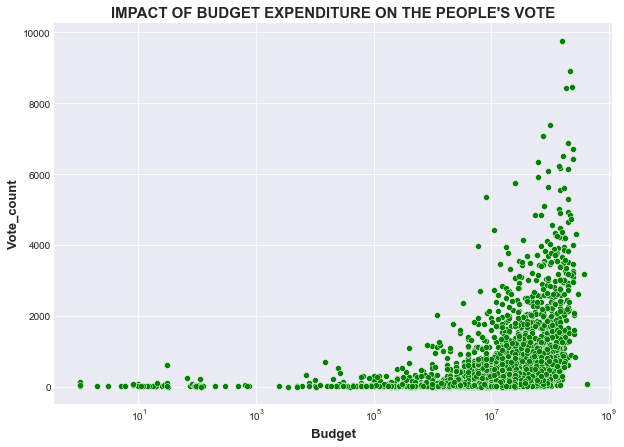

In [94]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x ='budget', y='vote_count', color='green', estimator='sum')
plt.xscale('log')
plt.xlabel('Budget', size=13, weight='bold')
plt.ylabel('Vote_count', size=13, weight='bold')
plt.title("IMPACT OF BUDGET EXPENDITURE ON THE PEOPLE'S VOTE", size=15, weight='bold');

### The Year with the Highest Production

- The interest in this section is to know the growth of movie across the year as the year increases

- As year increases there is an exponential increment in more people going into producing movie

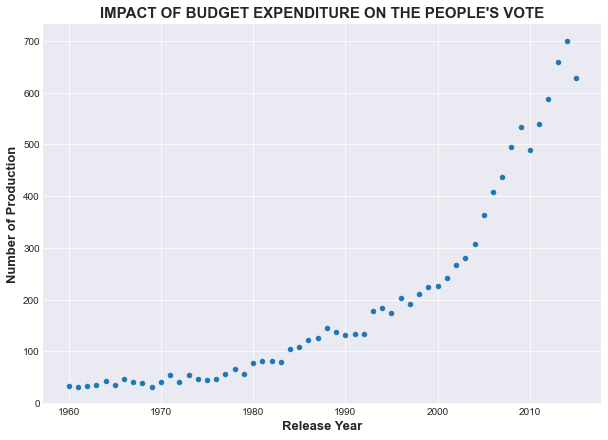

In [103]:
fig, ax = plt.subplots(figsize=(10,7))
df['release_year'].value_counts().sort_values(ascending=False).to_frame().reset_index().plot.scatter(x='index', y='release_year', ax = ax)
plt.xlabel('Release Year', size=13, weight='bold')
plt.title("IMPACT OF BUDGET EXPENDITURE ON THE PEOPLE'S VOTE", size=15, weight='bold')
plt.ylabel('Number of Production', size=13, weight='bold');

### Know the director that generates the Highest Revenue.

- In this section am interested in exploring the directors that are more productive and this can be done by investigating the revenue each director has been able to generate with in the range of period this the data was generate.

- To achieve this; below is a table showing the revenue generated in an increasing order.

In [96]:
dir_rev = df.groupby('director')['revenue'].sum().sort_values(ascending=False).to_frame().head(10)
dir_rev['revenue'] = (dir_rev['revenue']/1000000).map('${:,.2f}M'.format)
dir_rev

,revenue
director,
Steven Spielberg,"$9,018.56M"
Peter Jackson,"$6,523.24M"
James Cameron,"$5,841.89M"
Michael Bay,"$4,917.21M"
Christopher Nolan,"$4,167.55M"
David Yates,"$4,154.30M"
Robert Zemeckis,"$3,869.69M"
Chris Columbus,"$3,851.49M"
Tim Burton,"$3,665.41M"


### The Years with the Highest Revenue.

- In the above exploration we have able to discover that production increases with year hence in this section we will explore to see if increase in production by year actually led to increase in the revenue generated across the year

- Below table show the total revenue generated across the year

In [105]:
rev_by_yr = df.groupby('release_year')['revenue'].sum().sort_values(ascending=False).to_frame().head(10)
rev_by_yr['revenue'] = (rev_by_yr['revenue']/1000000).map('${:,.2f}M'.format)
rev_by_yr

,revenue
release_year,
2015,"$26,762.45M"
2013,"$24,703.63M"
2012,"$24,668.43M"
2014,"$24,331.15M"
2011,"$23,695.59M"
2009,"$22,180.17M"
2010,"$21,959.03M"
2008,"$19,431.70M"
2007,"$19,411.67M"


### Distribution of Budget

- We will investigate the distrubution the budget in the data using both histogram and boxplot

- We can deduce from the graph that the budget is rightly(positively) skewed and investigating further we will find out that the degree of skewness is very high with a value of 3.72

- Also the boxplot below also pointed out to this fact which means budget for production in general is usually less than 1*10^8

degree of skewness:  3.72


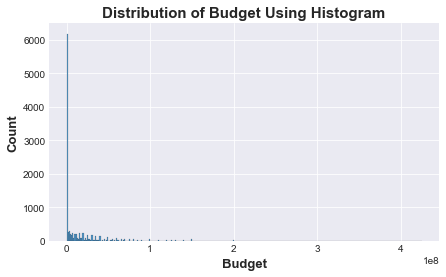

In [131]:
plt.figure(figsize=(7,4))
sns.histplot(x = 'budget', data=df)
plt.xlabel('Budget', size=13, weight='bold')
plt.title("Distribution of Budget Using Histogram", size=15, weight='bold')
plt.ylabel('Count', size=13, weight='bold');
print("degree of skewness: ", np.round(df['budget'].skew(), 2))

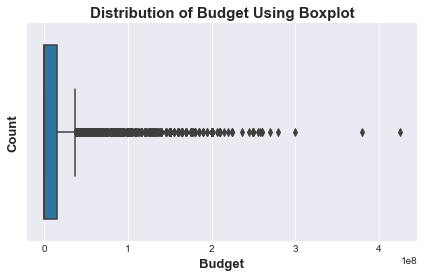

In [127]:
plt.figure(figsize=(7,4))
sns.boxplot(x = 'budget', data=df)
plt.xlabel('Budget', size=13, weight='bold')
plt.title("Distribution of Budget Using Boxplot", size=15, weight='bold')
plt.ylabel('Count', size=13, weight='bold');

<a id='conclusions'></a>
## Conclusions

> From my findings, the graph above shows the first five most popular movies includes `Jurassic World`, `Mad Max: Fury Road`, `Interstellar`, `Guardians of the Galaxy` and `Insurgent`
>
> Also, there is a clear trend between Budget and Revenue which means statistically speaking movies with higher budgets tends to generate more profit.
>
> Also, Movies the customer rated high are movies the tends to have higher budget and the tend to generate more revenue.
>
> Also, as the year increases, the number of movies been produced also increases exponentially which means competition in the movie industry is increasing.
>
> A few directors, which I would consider to have a better know-how when it comes to movie production given the revenue they were able to raise includes; `Steven Spielberg`	901.856M
`Peter Jackson`	6.5M James Cameron	5.842M
>
> Also with the year increasing, the revenue is also increasing.

### Limitations
> The limitation I can identify in the dataset is that the cast and other clustered strings could have been correctly formatted.